**Integrantes:**

**Nicolás Castro**

**Natalia Peñaranda**

**Cristian Mateo Rodríguez**

In [1]:
!pip install -U fortran-magic
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.7 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [2]:
assert ran_the_first_cell, "Oh noes!"

In [3]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [4]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [5]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [6]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [7]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [8]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [9]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [10]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [11]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [12]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [13]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [14]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [15]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [16]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [17]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [18]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [19]:
%%time

matmul(a, b)

CPU times: user 98 µs, sys: 0 ns, total: 98 µs
Wall time: 121 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [20]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass retbleed
bogomips	: 4499.99
TLB s

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [21]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [22]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out
matmul(a,b) # Efectivamente se produce error

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [23]:
if len(a[0]) == len(b):
  print("Las matrices son compatibles para multiplicación de matrices.")
else:
  print("Las matrices no son compatibles para multiplicación de matrices.")

Las matrices no son compatibles para multiplicación de matrices.


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [24]:
def matmul(A, B): 
    """Multiply matrix A by matrix B."""
    if len(A[0]) != len(B):
      print("Las matrices no son compatibles para multiplicación de matrices.")
      return None
    len(A[0]) == len(B)
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out
matmul(a,b)

Las matrices no son compatibles para multiplicación de matrices.


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [25]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [6, 7, 8, 9]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [26]:
def matmul(A, B): 
    """Multiply matrix A by matrix B."""
    if len(A[0]) != len(B):
      print("Las matrices no son compatibles para multiplicación de matrices.")
      return None
    len(A[0]) == len(B)
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out
matmul(a,b)

[[23, 29, 35, 41], [32, 41, 50, 59], [59, 77, 95, 113], [9, 12, 15, 18]]

In [27]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7609892645838515, 0.1524803206425882, 0.9555637467257557],
 [0.9676008542192174, 0.46303105989454185, 0.7573772762077423]]

In [28]:
#Matrices a multiplicar:
A=random_matrix(600,100)
B=random_matrix(100,600)

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [29]:
%%time
#Matrices a multiplicar:
A=random_matrix(600,100)
B=random_matrix(100,600)
X=matmul(A,B)

CPU times: user 8.56 s, sys: 66.8 ms, total: 8.63 s
Wall time: 12.2 s


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [30]:
#Creamos un diccionario para añadir los datos y luego el dataframe
datos={"Language":[],"Avg Seconds":[]}
#Añadimos los datos manualmente pues no se pueden almacenar los valores de %%time
py=[11.9,11.5,11.6,11.5,11.6,11.1,11.7,10.9,11.6,10.9]
datos["Avg Seconds"].append(np.mean(py))
datos["Language"].append("Python")
print(datos)

#dfdatos=pd.DataFrame(datos) Se usará una vez el diccionario esté completo

{'Language': ['Python'], 'Avg Seconds': [11.43]}


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [31]:
%%time
#Matrices a multiplicar:
A=np.random.rand(600,100)
B=np.random.rand(100,600)
X=np.matmul(A,B)

CPU times: user 12.5 ms, sys: 9.99 ms, total: 22.5 ms
Wall time: 16.3 ms


In [32]:
#Agregamos los datos al diccionario que tenemos
NPy=[0.0109,0.011,0.00877,0.0109,0.0326,0.0113,0.00840,0.0112,0.0119,0.00877]
datos["Avg Seconds"].append(np.mean(NPy))
datos["Language"].append("NumPy")
print(datos)

{'Language': ['Python', 'NumPy'], 'Avg Seconds': [11.43, 0.012573999999999998]}


In [33]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [34]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [35]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 52.2 ms, sys: 40.8 ms, total: 93 ms
Wall time: 50.4 ms


333328333350000.0

In [36]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [37]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 136 µs, sys: 9 µs, total: 145 µs
Wall time: 153 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [38]:
A = [[3, 5],
     [2, 9]]

B = [[14, 12],
     [2, 33]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [39]:
%%fortran
subroutine fortran_dot_product(A, B, result)
    double precision, intent(in) :: A(:)
    double precision, intent(in) :: B(:)
    double precision, intent(out) :: result
    
    result = sum(A * B)
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [40]:
%%time
fortran_dot_product(A, B)

CPU times: user 67 µs, sys: 5 µs, total: 72 µs
Wall time: 77.5 µs


403.0

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [41]:
randA = random_matrix(600, 100)
randB = random_matrix(100, 600)

In [42]:
%%fortran
subroutine fortran_dot_product(randA, randB, resultado)
    double precision, intent(in) :: randA(:)
    double precision, intent(in) :: randB(:)
    double precision, intent(out) :: resultado
    
    resultado = sum(randA * randB)
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [43]:
%%time
fortran_dot_product(randA, randB)

CPU times: user 4.42 ms, sys: 2.09 ms, total: 6.51 ms
Wall time: 7.38 ms


15024.44748600167

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [44]:
import time
N= 10
promedio=0
for i in range(N):
  inicio=time.process_time()
  fortran_dot_product(randA,randB)
  fin=time.process_time()
  promedio+=fin-inicio
promedio /=10

datos["Avg Seconds"].append(promedio)
datos["Language"].append("FortranMagic")

In [45]:
print(datos)

{'Language': ['Python', 'NumPy', 'FortranMagic'], 'Avg Seconds': [11.43, 0.012573999999999998, 0.004279050399999385]}


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [46]:
%%writefile test.f
      program TEST

        integer :: n=600
        integer :: m=100
        integer :: p=600

        real :: T,inicio,fin

        integer :: r, i, j, k

        double precision, dimension (600,100) :: A
        double precision, dimension (100,600) :: B
        double precision, dimension (600,600) :: C
        
        do i = 1, n 
             do j = 1, n
                 A(i, j) = i+j *0.1
             end do
        end do

        do i = 1, n 
             do j = 1, n
                 B(i, j) = i+j *0.5
            end do
        end do

        T= 0.0

        do r= 1, 10
           call cpu_time(inicio)
           C= matmul(A,B)
           call cpu_time(fin)
           T=T + (fin-inicio)
        end do

        T=T/10.0

        PRINT *,T
        stop
      end


Writing test.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [47]:
!gfortran test.f -o test
!./test

   6.21010037E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [48]:
datos["Avg Seconds"].append(6.79400051E-03)
datos["Language"].append("Fortran")
print(datos)

{'Language': ['Python', 'NumPy', 'FortranMagic', 'Fortran'], 'Avg Seconds': [11.43, 0.012573999999999998, 0.004279050399999385, 0.00679400051]}


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [49]:
%%writefile test.c

#include <stdio.h>
#include <stdlib.h>

int main() {
    int m, n, i, j, p, q, k;
    int A[600][100], B[100][600], C[600][600];

    printf("Orden de la primera matriz\n");
    scanf("%d%d", & m, & n);
    printf("Orden de la segunda matriz\n");
    scanf("%d%d", & i, & j);

    if (n != i) {
      printf("Las dimensiones no permiten la multiplicación de matrices\n");
    } else {
        for (p = 0; p < 600; p++) {
            for (q = 0; q < 100; q++) {
                scanf("%d", & A[p][q]);
            }
        }

        for (p = 0; p < 100; p++) {
            for (q = 0; q < 600; q++) {
                scanf("%d", & B[p][q]);
            }
        }

        for (p = 0; p < 600; p++) {
            for (q = 0; q < 600; q++) {
                C[p][q] = 0;
                for (k = 0; k < 100; k++) {
                    C[p][q] += A[p][k] * B[k][q];
                }
            }
        }

        printf("El producto de las matrices es:-\n");

        for (p = 0; p < 600; p++) {
            for (q = 0; q < 600; q++) {
                printf("%d\t", C[p][q]);
            }
            printf("\n");
        }
    }

    return 0;
}

Writing test.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [50]:
%%writefile test.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
    int m, n, i, j, p, q, k;
    int A[600][100], B[100][600], C[600][600];

    clock_t start_t, end_t;
    double total_t;
    for(int x = 0; x  < 10; x++){

      if (n != i) {
          printf("Las dimensiones no permiten la multiplicación de matrices\n");
      } 
    
      for (p = 0; p < 600; p++) {
          for (q = 0; q < 100; q++) {
                A[p][q] = rand();
            }
        }

      for (p = 0; p < 100; p++) {
          for (q = 0; q < 600; q++) {
                B[p][q] = rand();
            }
        }

    start_t = clock(); 

        for (p = 0; p < 600; p++) {
            for (q = 0; q < 600; q++) {
                C[p][q] = 0;
                for (k = 0; k < 100; k++) {
                    C[p][q] += A[p][k] * B[k][q];
                }
            }
        }
    end_t = clock();

      total_t = ((double)(end_t - start_t) / CLOCKS_PER_SEC)*1000;
      printf("Tiempo total empleado, intento %d: %f milisegundos\n", x ,total_t );
   
    }

    return 0;
}

Overwriting test.c


**My own example 21 - Adding c average execution time to the data frame**

In [51]:
%%time 
!gcc test.c -o test
!./test

Tiempo total empleado, intento 0: 117.933000 milisegundos
Tiempo total empleado, intento 1: 114.252000 milisegundos
Tiempo total empleado, intento 2: 109.654000 milisegundos
Tiempo total empleado, intento 3: 114.585000 milisegundos
Tiempo total empleado, intento 4: 115.661000 milisegundos
Tiempo total empleado, intento 5: 107.756000 milisegundos
Tiempo total empleado, intento 6: 112.764000 milisegundos
Tiempo total empleado, intento 7: 105.095000 milisegundos
Tiempo total empleado, intento 8: 117.372000 milisegundos
Tiempo total empleado, intento 9: 107.160000 milisegundos
CPU times: user 28.8 ms, sys: 15.3 ms, total: 44.1 ms
Wall time: 1.34 s


In [52]:
c=[0.330048,0.323513,0.325467,0.253052,0.180561,0.183437,0.181284,0.175949,0.182233,0.172374]
datos["Avg Seconds"].append(np.mean(c))
datos["Language"].append("C")
print(datos)

{'Language': ['Python', 'NumPy', 'FortranMagic', 'Fortran', 'C'], 'Avg Seconds': [11.43, 0.012573999999999998, 0.004279050399999385, 0.00679400051, 0.2307918]}


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [53]:
%%writefile matrix.cc

#include <iostream>
#include <ctime>
#include <cmath>
#include <cstdlib>
using namespace std;

int main() {
int A[600][100], B[100][600], C[600][600], p, q, s, l, i, j, k;
p=600;
q=100;
s=100;
l=600;
clock_t t0, t1;
double time;
int x;
int r=rand();
for( x = 0; x < 10; x++){

   // Matriz A
    for(i = 0; i < p; ++i){
        for(j = 0; j < q; ++j) {
            A[i][j]=rand();
        }
    }
    // Matriz B
    for(i = 0; i < s; ++i){
        for(j = 0; j < l; ++j) {
            B[i][j]=rand();
        }
    }

    // Matriz C con elementos 0
    for(i = 0; i < p; ++i){
        for(j = 0; j < l; ++j) {
            C[i][j]=0;
        }
    }
t0=clock();

    // Multiplicación de matrices A y B, resultado en matriz C
    for(i = 0; i < p; ++i){
        for(j = 0; j < l; ++j){
            for(k = 0; k < q; ++k) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }

t1 = clock();
    
    // Displaying the multiplication of two matrix.
    for(i = 0; i < p; ++i){
      for(j = 0; j < l; ++j) {
     }
    }
    time = (double(t1-t0)/CLOCKS_PER_SEC)*1000;
    //cout << "Tiempo de ejecución: " << time << endl;
    cout <<"Tiempo total empleado, intento:"<< x << " " << time << " milisegundos\n";
    
  }
    return 0;
}

Writing matrix.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [54]:
%%time
!g++ matrix.cc -o matrix
!./matrix

Tiempo total empleado, intento:0 113.748 milisegundos
Tiempo total empleado, intento:1 112.067 milisegundos
Tiempo total empleado, intento:2 107.696 milisegundos
Tiempo total empleado, intento:3 108.72 milisegundos
Tiempo total empleado, intento:4 101.637 milisegundos
Tiempo total empleado, intento:5 107.633 milisegundos
Tiempo total empleado, intento:6 113.414 milisegundos
Tiempo total empleado, intento:7 107.037 milisegundos
Tiempo total empleado, intento:8 101.995 milisegundos
Tiempo total empleado, intento:9 109.001 milisegundos
CPU times: user 38.7 ms, sys: 19.9 ms, total: 58.6 ms
Wall time: 1.94 s


**My own example 24 - Adding C++ average execution time to the data frame**

In [55]:
cp=[0.174466,0.165846,0.166136,0.186252,0.165115,0.161821,0.172087,0.163564,0.18582,0.179144]
datos["Avg Seconds"].append(np.mean(cp))
datos["Language"].append("C++")
print(datos)

{'Language': ['Python', 'NumPy', 'FortranMagic', 'Fortran', 'C', 'C++'], 'Avg Seconds': [11.43, 0.012573999999999998, 0.004279050399999385, 0.00679400051, 0.2307918, 0.17202510000000001]}


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [56]:
#Executing java
%%writefile Matrixmul.java
import java.util.Random;

class Main {

  public static void main(String[] args) {
    
    Random r = new Random();
    int Af,Ac,Bf,Bc;
    Af = 600;
    Ac = 100;
    Bf = 100; 
    Bc = 600; 

        int[][] A =new int[Af][Ac];
        int[][] B = new int[Bf][Bc];
        int[][] mul = new int [Af][Bc];  
        
        //A
        for(int i=0;i<Af;i++)
        {
        for(int j=0;j<Ac;j++)
        {
            A[i][j]=r.nextInt(100);         
        }
        }


        //B
        for(int x=0;x<Bf;x++)
        {
        for(int y=0;y<Bc;y++)
        {
            B[x][y]=r.nextInt(100);
        }
        }

             
        for(int i=0;i<Af;i++)    
            {    
                for(int j=0;j<Bc;j++)    
                    {    
                        mul[i][j]=0;    
                        for(int x=0;x<Bf;x++)    
                        {    
                            mul[i][j]+=A[i][x]*B[x][j];    
                        }    
                    }    
            }

        
    
  }
}

Writing Matrixmul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [57]:
#Ejecutar Java
%%time
!javac Matrixmul.java
!java Main

CPU times: user 32.1 ms, sys: 12.3 ms, total: 44.3 ms
Wall time: 2.14 s


**My own example 27 - Adding Java average execution time to the data frame**

In [58]:
#Agregamos los datos al diccionario que tenemos
Java=[0.0414,0.0451,0.0417,0.0488,0.0433,0.05899,0.04644,0.0424,0.0498,0.059]
datos["Avg Seconds"].append(np.mean(Java))
datos["Language"].append("Java")
print(datos)

{'Language': ['Python', 'NumPy', 'FortranMagic', 'Fortran', 'C', 'C++', 'Java'], 'Avg Seconds': [11.43, 0.012573999999999998, 0.004279050399999385, 0.00679400051, 0.2307918, 0.17202510000000001, 0.047693]}


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [59]:
#Executing js
%%writefile matrixmul.js

function getRandomInt(max) {
  return Math.floor(Math.random() * max);
}

function randmatrix(f,c){
    var matrix = new Array(f);
    for (var i = 0; i < matrix.length; i++) {
        matrix[i] = new Array(c);
}   
 
    for (var i = 0; i < f; i++) {
        for (var j = 0; j < c; j++) {
         matrix[i][j] = getRandomInt(100);
        }
    }

    return matrix;
}

var Af = 600;
var Ac = 100;
var Bf = 100;
var Bc = 600; 


var A = randmatrix(Af,Ac);
var B = randmatrix(Bf,Bc);
var mul = randmatrix(Af,Bc);

if( Ac !== Bf){
    return 0; 
}

    for(var i=0; i < Af;i++)    
          {    
              for(var j=0; j < Bc; j++)    
                  {    
                      mul[i][j]=0;    
                      for(var x=0;x<Bf;x++)    
                        {    
                          mul[i][j]+=A[i][x]*B[x][j];    
                        }    
                  }    
          }



Writing matrixmul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [60]:
%%time
#execution file
!node matrixmul.js

CPU times: user 7.13 ms, sys: 6.06 ms, total: 13.2 ms
Wall time: 316 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [61]:
#Agregamos los datos al diccionario que tenemos
Js=[0.0231,0.0202,0.0213,0.0206,0.0218,0.0223,0.021,0.0212,0.0265,0.0207]
datos["Avg Seconds"].append(np.mean(Js))
datos["Language"].append("JavaScript")
dfdatos=pd.DataFrame(datos)
print(dfdatos)

       Language  Avg Seconds
0        Python    11.430000
1         NumPy     0.012574
2  FortranMagic     0.004279
3       Fortran     0.006794
4             C     0.230792
5           C++     0.172025
6          Java     0.047693
7    JavaScript     0.021870


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [62]:
Avg=dfdatos["Avg Seconds"]
min=dfdatos.iloc[Avg.idxmin()]
print("El lenguaje más rápido fue:")
print(min)

El lenguaje más rápido fue:
Language       FortranMagic
Avg Seconds        0.004279
Name: 2, dtype: object


**My own example 32 - Adding the Speed factor columne to the data frame**

In [63]:
vmin=min["Avg Seconds"]
sf=[x/vmin for x in Avg]
dfdatos["Speed Factor"]=sf
print(dfdatos)

       Language  Avg Seconds  Speed Factor
0        Python    11.430000   2671.153394
1         NumPy     0.012574      2.938502
2  FortranMagic     0.004279      1.000000
3       Fortran     0.006794      1.587736
4             C     0.230792     53.935284
5           C++     0.172025     40.201700
6          Java     0.047693     11.145697
7    JavaScript     0.021870      5.110947


**My own example 33 - Sorting the the data frame by average execution time**

In [64]:
dfdatos.sort_values(by="Speed Factor")

,Language,Avg Seconds,Speed Factor
2,FortranMagic,0.004279,1.000000
3,Fortran,0.006794,1.587736
1,NumPy,0.012574,2.938502
7,JavaScript,0.021870,5.110947
6,Java,0.047693,11.145697
5,C++,0.172025,40.201700
4,C,0.230792,53.935284
0,Python,11.430000,2671.153394


## Why is the Python Version so Much Slower?

In [65]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [66]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [67]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [68]:
data + data

array([2, 4, 6, 8])

In [69]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 398 µs, sys: 29 µs, total: 427 µs
Wall time: 433 µs


333328333350000.0

In [70]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 897 µs, sys: 1.98 ms, total: 2.88 ms
Wall time: 2.92 ms


333328333350000.0

In [71]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 241 µs, sys: 0 ns, total: 241 µs
Wall time: 152 µs


333328333350000.0

In [72]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [73]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [74]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [75]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [76]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [77]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [78]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [79]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [80]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [81]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [82]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [83]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [84]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [85]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [86]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [87]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [88]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [89]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [90]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [91]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [92]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [93]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [94]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [95]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [96]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [97]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [98]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [99]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [100]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [101]:
variance(np.random.standard_normal(1000))

0.9805336934666341

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [102]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [103]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [104]:
data.mean()

14.5

In [105]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [106]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [107]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [108]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [109]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [110]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [111]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [112]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [113]:
# ... or by label.
s.loc['a']

1

In [114]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [115]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [116]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [117]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [118]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [119]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [120]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [121]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

FileNotFoundError: ignored

In [122]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

NameError: ignored

In [123]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

NameError: ignored

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [124]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

NameError: ignored

In [125]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

NameError: ignored

In [126]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

NameError: ignored

# "Real World" Data

In [127]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52
Unpacking objects: 100% (88/88), 11.87 MiB | 15.06 MiB/s, done.


In [128]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [129]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

NameError: ignored

In [130]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

NameError: ignored

In [131]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [132]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

NameError: ignored

In [133]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

NameError: ignored

In [134]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

NameError: ignored

**My own example**

In [135]:
import pandas as pd
df2 = pd.read_csv("https://www.datos.gov.co/resource/u56b-h56z.csv?$query=SELECT%0A%20%20%60fecha_precio%60%2C%0A%20%20%60anio%60%2C%0A%20%20%60mes%60%2C%0A%20%20%60dia%60%2C%0A%20%20%60departamento%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60codigo_municipio_dane%60%2C%0A%20%20%60producto%60%2C%0A%20%20%60valor_precio%60")
df2

,fecha_precio,anio,mes,dia,departamento,municipio,codigo_municipio_dane,producto,valor_precio
0,01 Jan 2023,2023,1,1,NORTE DE SANTANDER,ABREGO,54003.0,GASOLINA CORRIENTE,9000
1,01 Jan 2023,2023,1,1,NORTE DE SANTANDER,ABREGO,54003.0,GASOLINA CORRIENTE,9000
2,01 Jan 2023,2023,1,1,NORTE DE SANTANDER,ABREGO,54003.0,GASOLINA CORRIENTE,9000
3,02 Jan 2023,2023,1,2,MAGDALENA,EL BANCO,47245.0,GASOLINA CORRIENTE,10600
4,01 Jan 2023,2023,1,1,SANTANDER,RIONEGRO,68615.0,ACPM,8670
...,...,...,...,...,...,...,...,...,...
995,03 Jan 2023,2023,1,3,TOLIMA,FRESNO,73283.0,GASOLINA CORRIENTE,10380
996,04 Jan 2023,2023,1,4,BOYACA,DUITAMA,15238.0,GASOLINA CORRIENTE,10510
997,02 Jan 2023,2023,1,2,BOLIVAR,MOMPOS,13468.0,GASOLINA CORRIENTE,10480
998,02 Jan 2023,2023,1,2,ANTIOQUIA,MEDELLIN,5001.0,GASOLINA CORRIENTE,10680


In [136]:
df2.dtypes

fecha_precio              object
anio                       int64
mes                        int64
dia                        int64
departamento              object
municipio                 object
codigo_municipio_dane    float64
producto                  object
valor_precio               int64
dtype: object

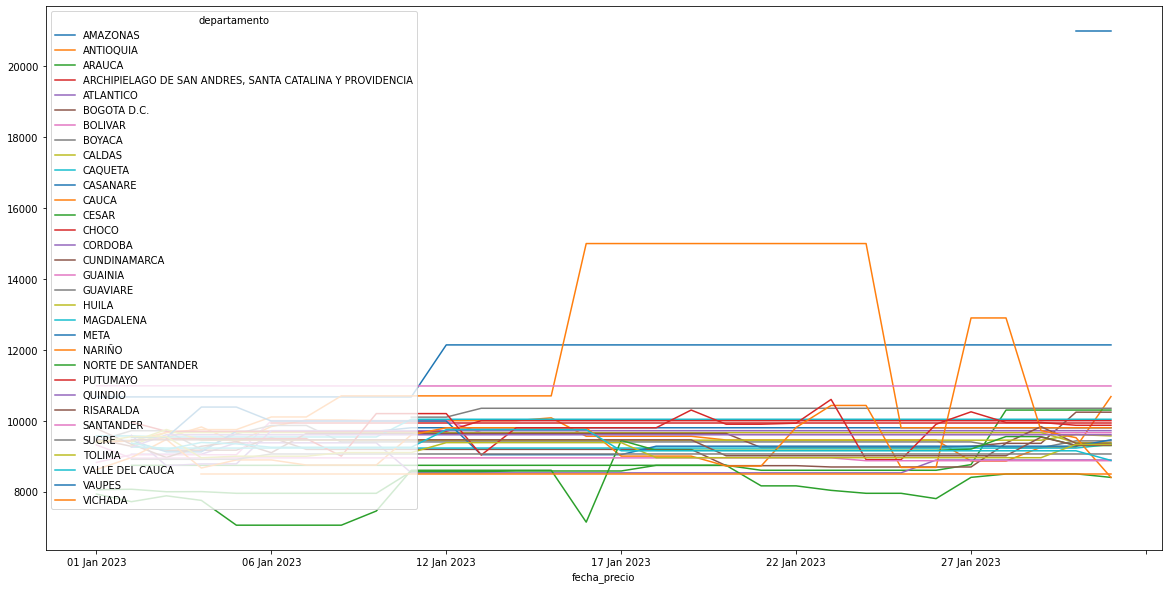

In [137]:
mun = df2[df2.producto == 'ACPM']
mun.groupby(["fecha_precio", 'departamento'])['valor_precio'].mean().unstack().ffill().plot(figsize=(20, 10));

It's evident that the rise in Diesel Oil price was steeper the first 5 days of January than the rest of January.
There also appears to be another acceleration in the rise of Diesel prices at the end of January.


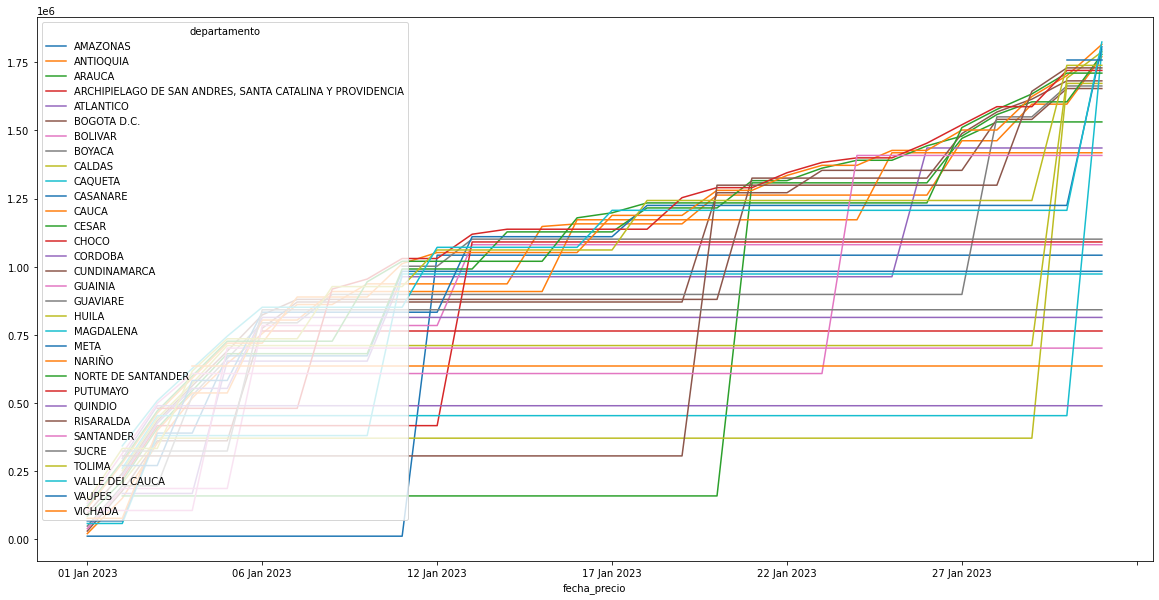

In [138]:
acpm = df2[df2["producto"] == "ACPM"]
acpm.groupby(['fecha_precio', 'departamento'])["valor_precio"].mean().cumsum().unstack().ffill().plot(figsize=(20, 10))
print("It's evident that the rise in Diesel Oil price was steeper the first 5 days of January than the rest of January.")
print("There also appears to be another acceleration in the rise of Diesel prices at the end of January.")

Because of the regression line in the scatter plot we can see that Diesel Oil have been constantly rising and it's highly possible that it continues to rise in the following months


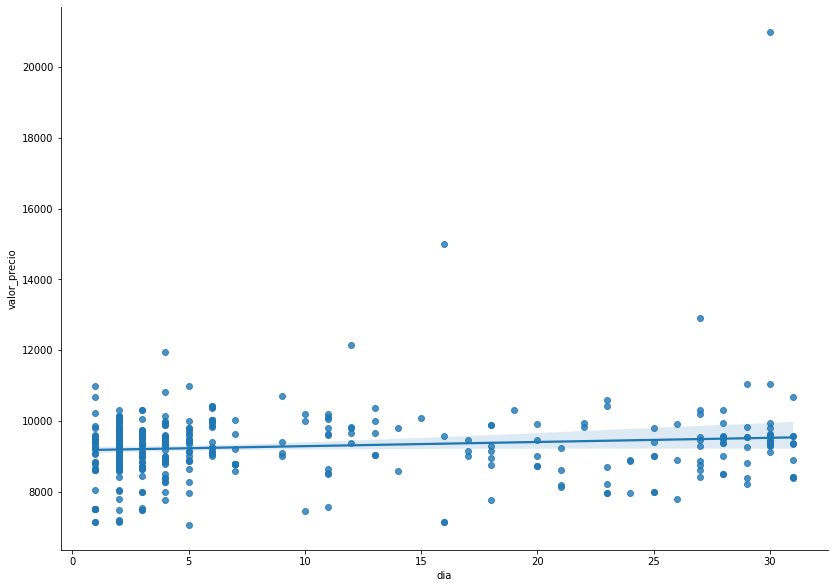

In [139]:
import seaborn as sns
sns.lmplot(x='dia',y='valor_precio',data=acpm,fit_reg=True,height=8.27, aspect=11.7/8.27) 
print("Because of the regression line in the scatter plot we can see that Diesel Oil have been constantly rising and it's highly possible that it continues to rise in the following months")

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!